## zfmlhw08

## 1. 阅读作业
阅读博客文章http://blog.csdn.net/baimafujinji/article/details/51724371 中的如下两个小节：  
考虑多分类的情况  
考虑特征值连续的情况  
注意这部分阅读内容很重要，因为完成后续作业需要用到它们。  
提交一张你阅读的界面截图。学习是自己的事情，请认真理解其中内容，切勿只截图而不阅读。

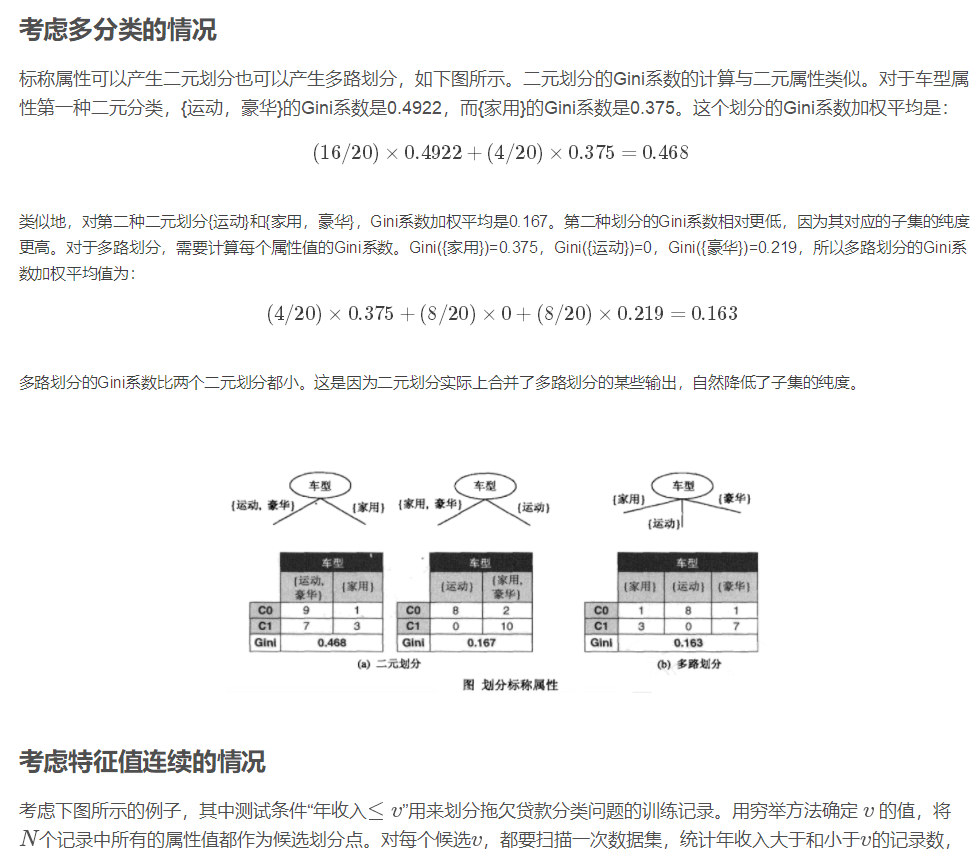

## 2. 问答题
注意写清楚完整的计算过程，只有结果，没有过程或者含糊不详是不被接受的  
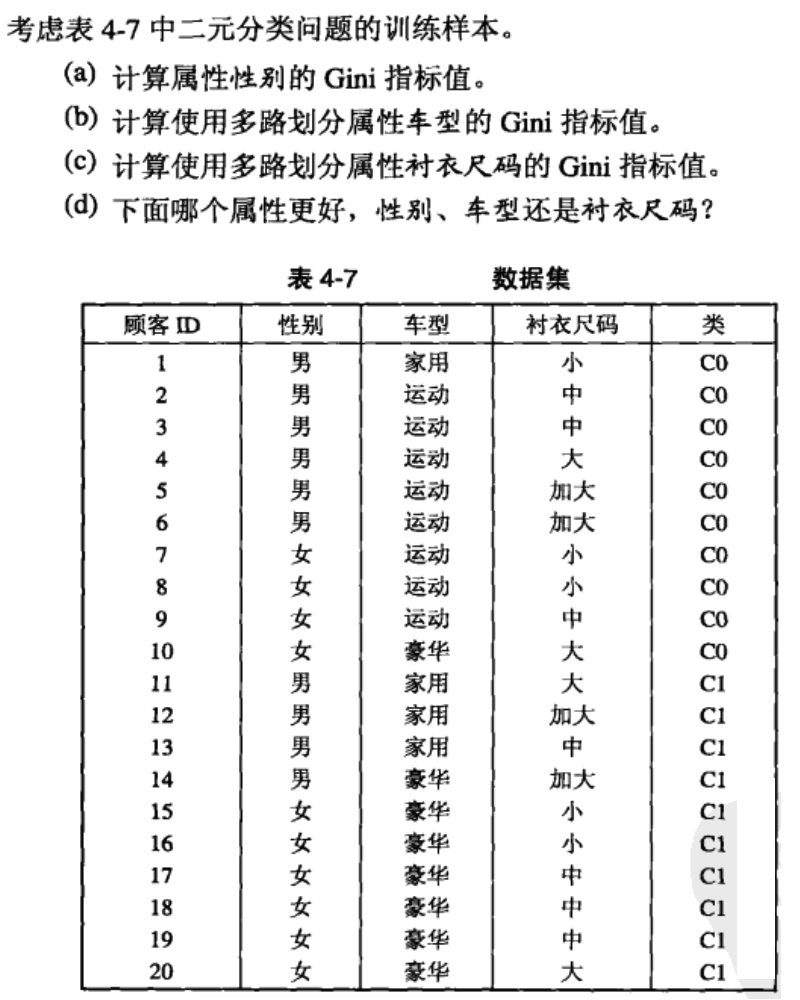

In [15]:
import pandas as pd

In [9]:
genderdict = {0:'男',1:'女'}
typedict = {0:'家用',1:'运动',2:'豪华'}
sizedict = {0:'小', 1:'中', 2:'大', 3:'加大'}
classdict = {0:'C0', 1:'C1'}

In [14]:
genderlist = [0]*6 + [1]*4 + [0]*4 + [1]*6
typelist = [0] + [1]*8 + [2] + [0]*3 + [2]*7
sizelist = [0] + [1]*2 + [2] + [3]*2+ [0]*2 +[1] + [2]*2 + [3] + [1] + [3] + [0]*2 + [1]*3 + [2]
classlist = [0]*10 + [1]*10

In [18]:
df = pd.DataFrame({'性别':[genderdict[i] for i in genderlist],
                   '车型':[typedict[i] for i in typelist],
                   '衬衣尺寸':[sizedict[i] for i in sizelist],
                   '类':[classdict[i] for i in classlist]})

In [19]:
df

,性别,车型,衬衣尺寸,类
0,男,家用,小,C0
1,男,运动,中,C0
2,男,运动,中,C0
3,男,运动,大,C0
4,男,运动,加大,C0
5,男,运动,加大,C0
6,女,运动,小,C0
7,女,运动,小,C0
8,女,运动,中,C0
9,女,豪华,大,C0


In [27]:
df[df['类']=='C0'][df['性别']=='男'].shape[0],df[df['类']=='C1'][df['性别']=='男'].shape[0]

/home/ian/installed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(6, 4)

In [34]:
def calGini(df, featureColName, classColName):
    '''
    计算某个特征的Gini值
    featureColName： 要计算的特征列的名称
    classColName：分类列的名称
    '''
    classes = df[classColName].unique()
    g_list = list()
    n = df.shape[0]
    for i in df[featureColName].unique():
        n1 = df[df[featureColName]==i].shape[0]
        gini = 1
        # 计算每一个feature的Gini值
        for c in classes:
            n2 = df[df[featureColName]==i][df[classColName]==c].shape[0]
            gini = gini - (n2/n1)**2
        gini_w = n1/n*gini
        print('特征：{}\tGini值为{},加权后的Gini值为{}'.format(i,gini,gini_w))
        g_list.append(gini_w)
    giniF = sum(g_list)
    print('特征：{}\tGini值为{}'.format(featureColName, giniF))

### （a）计算性别的GINI值

In [35]:
calGini(df, '性别', '类')

特征：男	Gini值为0.48,加权后的Gini值为0.24
特征：女	Gini值为0.48,加权后的Gini值为0.24
特征：性别	Gini值为0.48


/home/ian/installed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


### （b）计算车型的GINI值

In [36]:
calGini(df,'车型','类')

特征：家用	Gini值为0.375,加权后的Gini值为0.07500000000000001
特征：运动	Gini值为0.0,加权后的Gini值为0.0
特征：豪华	Gini值为0.21875,加权后的Gini值为0.08750000000000001
特征：车型	Gini值为0.16250000000000003


/home/ian/installed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


### （c）计算尺码的GINI值

In [37]:
calGini(df,'衬衣尺寸','类')

特征：小	Gini值为0.48,加权后的Gini值为0.12
特征：中	Gini值为0.489795918367347,加权后的Gini值为0.17142857142857143
特征：大	Gini值为0.5,加权后的Gini值为0.1
特征：加大	Gini值为0.5,加权后的Gini值为0.1
特征：衬衣尺寸	Gini值为0.49142857142857144


/home/ian/installed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


### （4）哪种好

#### 由于属性 车型 具有更小的Gini值，所以 车型 更好

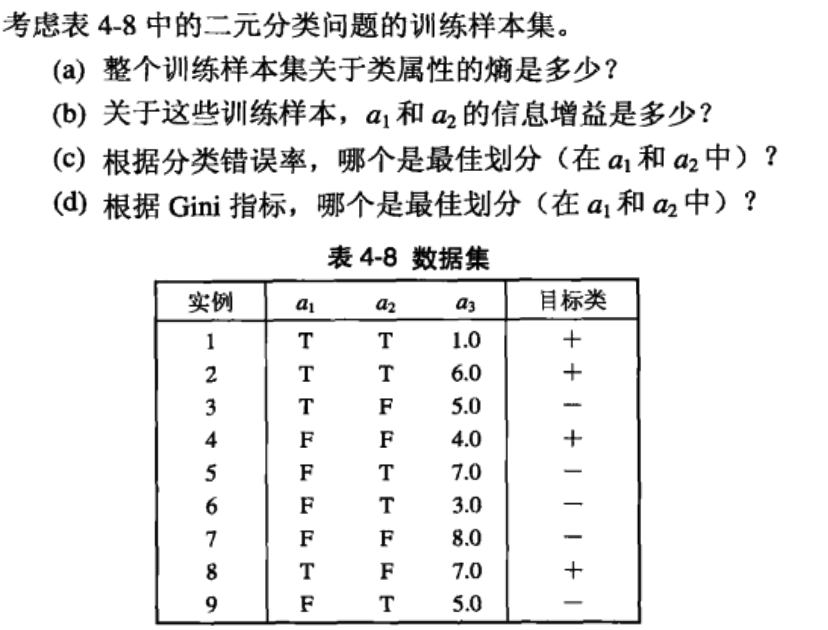

In [40]:
df1 = pd.DataFrame({'a1':['T','T','T','F','F','F','F','T','F'],'a2':['T','T','F','F','T','T','F','F','T'],
                    '目标类':['+','+','-','+','-','-','-','+','-']})

In [43]:
from math import log2

In [45]:
def calEntropy(df, col):
    colVals = df[col].unique()
    entropy = 0
    n = df.shape[0]
    for i in colVals:
        n1 = df[df[col]==i].shape[0]
        if n1 == 0:
            continue
        entropy += -(n1/n)* log2(n1/n)
    return entropy

### (a) 计算关于类属性的熵

In [46]:
calEntropy(df1,'目标类')

0.9910760598382222

### (b)计算a1和a2的信息增益

In [47]:
entropy_a1_T = calEntropy(df1[df1['a1']=='T'],'目标类')
entropy_a1_F = calEntropy(df1[df1['a1']=='F'],'目标类')

Gain = calEntropy(df1,'目标类') - df1[df1['a1']=='T'].shape[0]/df.shape[0]*entropy_a1_T \
                             - df1[df1['a1']=='F'].shape[0]/df.shape[0]*entropy_a1_F
print('a1的信息增益为：', Gain)

a1的信息增益为： 0.6483384112245552


In [48]:
entropy_a2_T = calEntropy(df1[df1['a2']=='T'],'目标类')
entropy_a2_F = calEntropy(df1[df1['a2']=='F'],'目标类')

Gain = calEntropy(df1,'目标类') - df1[df1['a2']=='T'].shape[0]/df.shape[0]*entropy_a2_T \
                             - df1[df1['a2']=='F'].shape[0]/df.shape[0]*entropy_a2_F
print('a2的信息增益为：', Gain)

a2的信息增益为： 0.5483384112245551


### (c)根据分类错误率，a1和a2哪个是最佳划分

In [49]:
def calMissClassification(df, featureColName, classColName):
    '''
    计算某个特征的分类误差值
    featureColName： 要计算的特征列的名称
    classColName：分类列的名称
    '''
    classes = df[classColName].unique()
    g_list = list()
    n = df.shape[0]
    for i in df[featureColName].unique():
        n1 = df[df[featureColName]==i].shape[0]
        v = 0
        # 计算每一个feature的分类误差值
        for c in classes:
            n2 = df[df[featureColName]==i][df[classColName]==c].shape[0]
            v = max(v,n2)
        error = 1 - v/n1
        error_w = error * (n1/n)
        print('特征：{}\t分类误差值为{},加权后的分类误差值为{}'.format(i,error,error_w))
        g_list.append(error_w)
    errorF = sum(g_list)
    print('特征：{}\t分类误差值为{}'.format(featureColName, errorF)) 

In [50]:
calMissClassification(df1, 'a1', '目标类')

特征：T	分类误差值为0.25,加权后的分类误差值为0.1111111111111111
特征：F	分类误差值为0.19999999999999996,加权后的分类误差值为0.11111111111111109
特征：a1	分类误差值为0.2222222222222222


/home/ian/installed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [51]:
calMissClassification(df1, 'a2', '目标类')

特征：T	分类误差值为0.4,加权后的分类误差值为0.22222222222222224
特征：F	分类误差值为0.5,加权后的分类误差值为0.2222222222222222
特征：a2	分类误差值为0.4444444444444444


/home/ian/installed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


### 由于a1的分类误差较小，所以a1是最佳划分

### (d)根据Gini值，哪个是最佳划分

In [52]:
calGini(df1, 'a1', '目标类')

特征：T	Gini值为0.375,加权后的Gini值为0.16666666666666666
特征：F	Gini值为0.31999999999999984,加权后的Gini值为0.1777777777777777
特征：a1	Gini值为0.34444444444444433


/home/ian/installed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [53]:
calGini(df1, 'a2', '目标类')

特征：T	Gini值为0.48,加权后的Gini值为0.26666666666666666
特征：F	Gini值为0.5,加权后的Gini值为0.2222222222222222
特征：a2	Gini值为0.4888888888888889


/home/ian/installed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


### 由于a1的Gini较小，所以a1是最佳划分

## 3. 应用实践题
在本次课程中，你已经初步学习了Weka的使用。现在你需要使用你学到的知识解决一个具体的问题，顺便实际体验一下Weka的使用。  
具体要求和提示：  
1）你的主要任务是利用课程资源链接中提供的数据集 data_for_assignment.csv，建立一棵决策树模型，请使用J48分类器。  
2）因为在Weka中进行机器学习是不需要编写代码的，所以你要提交的内容是：一张你使用Weka时操作界面的截图，以及最后构建出来的可视化显示的决策树截图。  
3）如果你的PC上还没有安装Weka，那么你可以到链接 https://www.cs.waikato.ac.nz/ml/weka/downloading.html 中下载到最新版本的Weka。

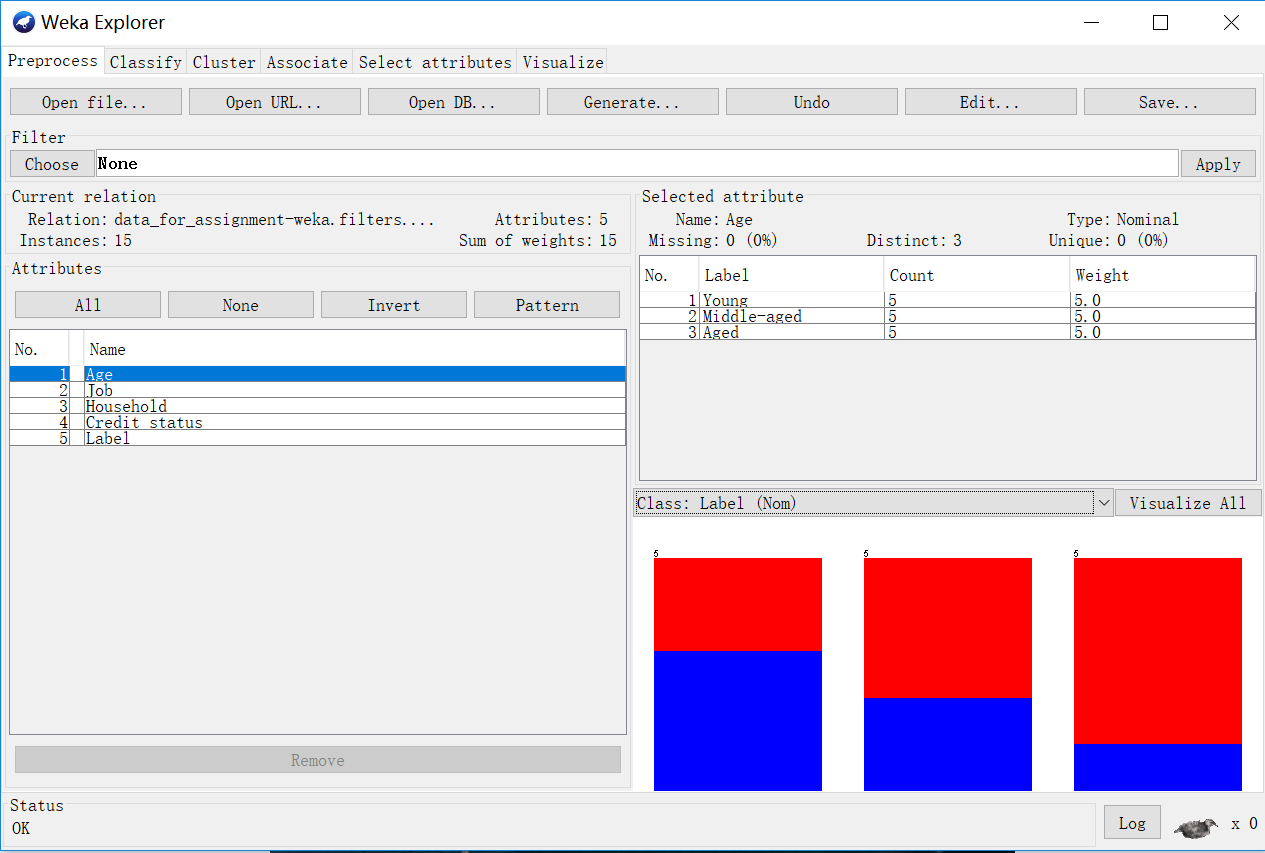

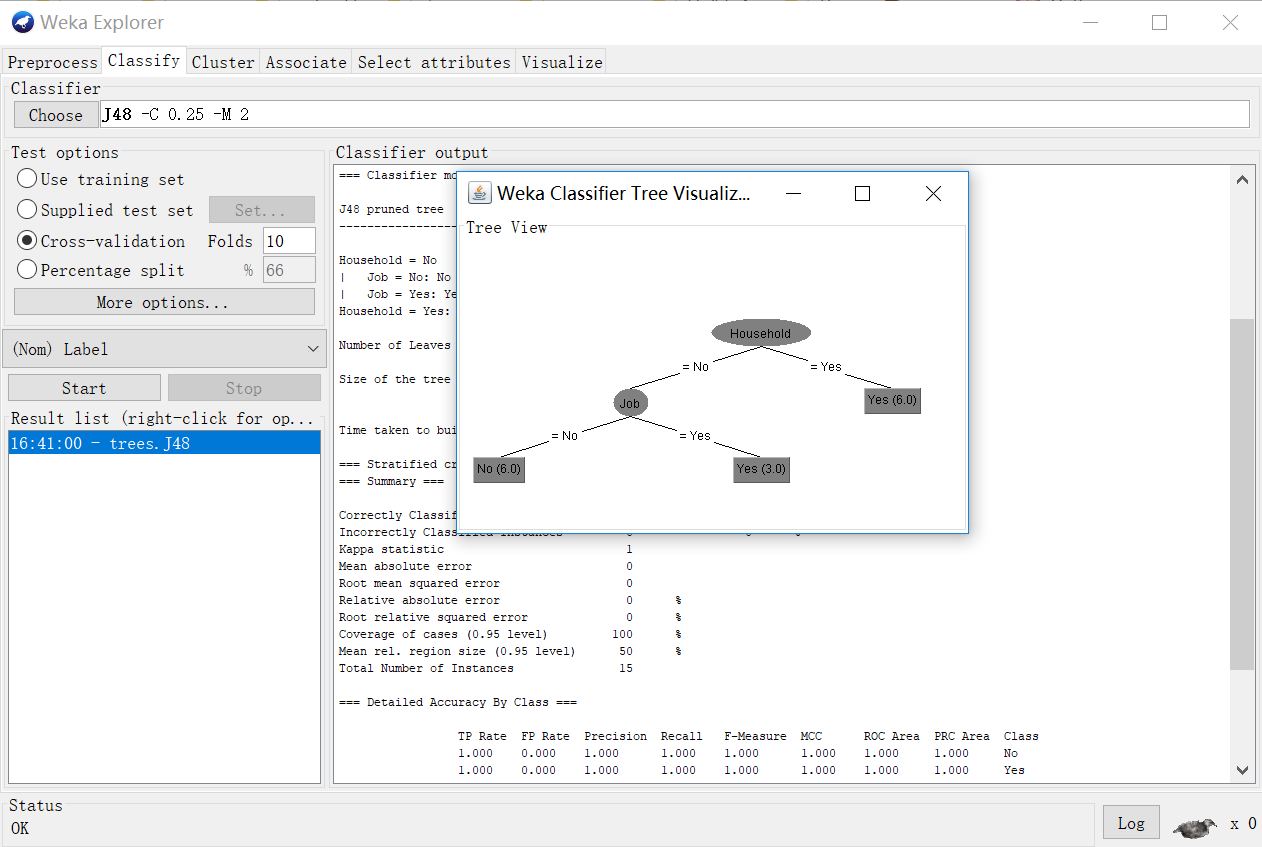

## end

## end

## end

## end

## end

## end

## end

## end